In [1]:
%pylab inline
import matplotlib
import pandas as pd
import numpy as np
from collections import Counter
from copy import copy

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Random Data Generation for Dating Profiles

In [2]:
import csv
import random
import datetime


def add_line_to_csv(csv_file, line_data):
    # Open the CSV file in append mode and ensure it doesn't append newlines automatically
    with open(csv_file, 'a', newline='') as file:
        # Create a CSV writer object
        writer = csv.writer(file)
        # Write the line_data to the CSV file as a new row
        writer.writerow(line_data)

def generate_random_data(csv_file, num_people,sex):
    # Define the categories for the CSV data
    categories = ['name', 'sex', 'age', 'body_type', 'diet', 'drinks', 'drugs', 'height', 'pets', 'religion', 'smokes','preferred_min_age',
                   'preferred_max_age', 'preferred_body_type', 'preferred_diet', 'preferred_drinks', 'preferred_drugs'
                    ,'preferred_height', 'preferred_pets', 'preferred_religion', 'preferred_smokes','updated_at']
    data = []
    men_names = [f"Man {i+1}" for i in range(num_people)]
    women_names = [f"Woman {i+1}" for i in range(num_people)]
    current_timestamp = datetime.datetime.now()
    # Generate data for male individuals
    if(sex=='M'):
      for i in range(num_people):
          person = {'name': men_names[i], 'sex': 'M'}
          data.append(person)
    # Generate data for female individuals
    if(sex=='F'):
      for i in range(num_people):
          person = {'name': women_names[i], 'sex': 'F'}
          data.append(person)

    # Generate random data for each person
    for person in data:
        for category in categories[2:]:
            if category == 'age':
                person[category] = random.randint(18, 35)
            elif category == 'body_type':
                person[category] = random.choice(['Slim', 'Average', 'Athletic', 'Curvy'])
            elif category == 'diet':
                person[category] = random.choice(['Vegan', 'Vegetarian', 'Omnivore'])
            elif category == 'drinks':
                person[category] = random.choice(['Never', 'Socially', 'Regularly'])
            elif category == 'drugs':
                person[category] = random.choice(['Never', 'Sometimes', 'Often'])
            elif category == 'height':
                person[category] = random.randint(150, 200)
            elif category == 'pets':
                person[category] = random.choice(['Dog', 'Cat', 'None'])
            elif category == 'religion':
                person[category] = random.choice(['Christian', 'Muslim', 'Jewish', 'Other'])
            elif category == 'smokes':
                person[category] = random.choice(['No', 'Occasionally', 'Yes'])
            elif category == 'preferred_min_age':
                person[category] = random.randint(18, 35)
            elif category == 'preferred_max_age':
                person[category] = person['preferred_min_age']+10
            elif category == 'preferred_body_type':
                person[category] = random.choice(['Slim', 'Average', 'Athletic', 'Curvy'])
            elif category == 'preferred_diet':
                person[category] = random.choice(['Vegan', 'Vegetarian', 'Omnivore'])
            elif category == 'preferred_drinks':
                person[category] = random.choice(['Never', 'Socially', 'Regularly'])
            elif category == 'preferred_drugs':
                person[category] = random.choice(['Never', 'Sometimes', 'Often'])
            elif category == 'preferred_height':
                person[category] = random.randint(150, 200)
            elif category == 'preferred_pets':
                person[category] = random.choice(['Dog', 'Cat', 'None'])
            elif category == 'preferred_religion':
                person[category] = random.choice(['Christian', 'Muslim', 'Jewish', 'Other'])
            elif category == 'preferred_smokes':
                person[category] = random.choice(['No', 'Occasionally', 'Yes'])
            person['updated_at']=current_timestamp
        # Create a list of values for the CSV row based on the person's data
        line_data = [person[category] for category in categories]
        # Add the line_data to the CSV file
        add_line_to_csv(csv_file, line_data)

# CSV Data Reading and Manipulation

In [3]:
import csv
import os

def read_csv_data(csv_file):
    people = []
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            people.append(row)
    return people

def add_lines_to_csv(file1, file2):
    with open(file2, 'r') as f2:
        lines = f2.readlines()
    with open(file1, 'a') as f1:
        f1.writelines(lines)

# Example usage
csv_file = 'data/people.csv'
people_data = read_csv_data(csv_file)

man_list = []
women_list = []

# Extract names from the CSV data based on the 'sex' column
for person in people_data:
    name = person['name']
    sex = person['sex']

    if sex == 'M':
        man_list.append(name)
    elif sex == 'F':
        women_list.append(name)

# Example usage - If the number of men and women is not balanced, generate random data
num_none = abs(len(man_list) - len(women_list))
if num_none > 0:
    if len(man_list) < len(women_list):
        generate_random_data('temp_people.csv', num_none, 'M')
        add_lines_to_csv(csv_file, 'temp_people.csv')
    elif len(man_list) > len(women_list):
        generate_random_data('temp_people.csv', num_none, 'F')
        add_lines_to_csv(csv_file, 'temp_people.csv')

# Re-read the updated CSV data
people_data = read_csv_data(csv_file)

man_list = []
women_list = []

# Extract names from the updated CSV data
for person in people_data:
    name = person['name']
    sex = person['sex']

    if sex == 'M':
        man_list.append(name)
    elif sex == 'F':
        women_list.append(name)

num_people = len(man_list) + len(women_list)

# Sort the lists of names
man_list = sorted(man_list)
women_list = sorted(women_list)
print("Man List:", man_list)
print("Women List:", women_list)

# Remove the temporary people CSV file
if num_none > 0:
    os.remove('temp_people.csv')


Man List: ['Eli Sadon', 'Itay Quatinsky', 'Michael Cohen', 'Nadav Green', 'Ofek Rabo', 'Oriel Naamat', 'Tal Shitrit', 'Tomer Malachi', 'Yehonatan Levi']
Women List: ['Avigail Graos', 'Chen Elmalam', 'Enbar Goeli', 'Liel Moshkovits', 'Rotem Tuvia', 'Shira Halevi', 'Woman 1', 'Yael', 'Yarden Ben Nahoum']


# Matching Algorithm for Men and Women

In [4]:
import csv
import pandas as pd
import math
import copy

def calculate_match_score(person1, person2):
    # Define the weights for each category (higher weight means higher importance)
    weights = {
        'preferred_body_type': 5,
        'preferred_diet': 5,
        'preferred_drinks': 3,
        'preferred_drugs': 3,
        'preferred_pets': 2,
        'preferred_religion': 50,
        'preferred_smokes': 5
    }
    main_category = ['body_type', 'diet', 'drinks', 'drugs', 'pets', 'religion', 'smokes']

   # Calculate the match score between two people
    score = 0
    for preferred_category, weight in weights.items():
      for category in main_category:
        if person1[preferred_category] == person2[category]:
          score += weight
    if (person1['preferred_min_age'] < person2['age']<person1['preferred_max_age']):
      score += 10
    if (person1['preferred_height'] > person2['height']):
      score += 1
    normalized_score = score
    return normalized_score

def create_match_scores_dataframes(csv_file):
    # Read the CSV file into a list of dictionaries
    people = []
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            people.append(row)

    # Separate men and women into different lists
    men = []
    women = []
    for person in people:
        if person['sex'] == 'M':
            men.append(person)
        elif person['sex'] == 'F':
            women.append(person)

    # Create DataFrames for men and women
    men = sorted(men, key=lambda x: x['name'])
    women = sorted(women, key=lambda x: x['name'])

    women_data = pd.DataFrame(columns=[person['name'] for person in women])
    men_data = pd.DataFrame(columns=[person['name'] for person in men])
    women_data=women_data.reindex(sorted(women_data.columns), axis=1)
    men_data=men_data.reindex(sorted(men_data.columns), axis=1)
    # Calculate the match score between each pair of women
    for i in range(len(women)):
        for j in range(len(men)):
            person1 = women[i]
            person2 = men[j]
            match_score = calculate_match_score(person1, person2)
            women_data.at[j, person1['name']] = match_score

    # Calculate the match score between each pair of men
    for i in range(len(men)):
        for j in range(len(women)):
            person1 = men[i]
            person2 = women[j]
            match_score = calculate_match_score(person1, person2)
            men_data.at[j, person1['name']] = match_score
    # Fill diagonal elements with a default value (e.g., 0)
    women_data.fillna(1, inplace=True)
    men_data.fillna(1, inplace=True)

    return women_data, men_data

# Example usage
csv_file = 'data/people.csv'
women_df, men_df = create_match_scores_dataframes(csv_file)

# Sort the DataFrames by column names
women_df = women_df.sort_index(axis=1)
men_df = men_df.sort_index(axis=1)

# Rank the scores in the DataFrames

#women_df = women_df.rank(axis=0, method='min', ascending=True)
#men_df = men_df.rank(axis=0, method='min', ascending=True)

w_add_list=[]
m_add_list=[]

# Check if additional RANDOM women or men were added
for item in man_list:
    for i in range(len(man_list)):
        if f"Man {i+1}" in item:
            m_add_list.append(item)
for item in women_list:
    for i in range(len(women_list)):
        if f"Woman {i+1}" in item:
            w_add_list.append(item)

# Convert the DataFrames to integer type
women_df = women_df.astype(int)
men_df = men_df.astype(int)

# Zero socres for Random pepoles
if len(m_add_list) < len(w_add_list):
  women_df[w_add_list] = 0
  for i in range(len(w_add_list)):
    index = women_list.index(f"Woman {i+1}")
    men_df.loc[index] = 0
else:
  men_df[w_add_list] = 0
  for i in range(len(m_add_list)):
    index = man_list.index(f"Man {i+1}")
    women_df.loc[index] = 0

women_dictionary = women_df.to_dict(orient='list')
men_dictionary = men_df.to_dict(orient='list')


# Print the updated DataFrames and dictionaries
print("Women DataFrame:")
print(women_df)
print()
print("Men DataFrame:")
print(men_df)
print("Women list:")
print(women_list)
print()
print("men list:")
print(man_list)
print()

print("Women dictionary:")
print(women_dictionary)
print()
print("Men dictionary:")
print(men_dictionary)
print()

# Sort the lists of men for each woman based on the scores
w_d=copy.deepcopy(women_dictionary)
m_d=copy.deepcopy(men_dictionary)
for woman in women_dictionary:
    scores = women_dictionary[woman]
    sorted_scores = sorted(range(len(scores)), key=lambda k: (-scores[k], man_list[k]))
    sorted_men = [man_list[i] for i in sorted_scores]
    women_dictionary[woman] = sorted_men

# Display the updated dictionaries
print("Women dictionary:")
print()
print(women_dictionary)


# Repeat the same process for the men's dictionary
for man in men_dictionary:
    scores = men_dictionary[man]
    sorted_scores = sorted(range(len(scores)), key=lambda k: (-scores[k], women_list[k]))
    sorted_women = [women_list[i] for i in sorted_scores]
    men_dictionary[man] = sorted_women

# Display the updated dictionaries
print("Men dictionary:")
print()
print(men_dictionary)

Women DataFrame:
   Avigail Graos  Chen Elmalam  Enbar Goeli  Liel Moshkovits  Rotem Tuvia  \
0             68            69           73               63           64   
1             62            81           77               57           62   
2             67            62           76               66           71   
3             66            71           71               71           77   
4             55            64           61               81           67   
5             60            68           66               76           81   
6             66            65           66               76           81   
7             56            66           66               61           62   
8             74            66           73               74           69   

   Shira Halevi  Woman 1  Yael  Yarden Ben Nahoum  
0            71        0    72                 68  
1            75        0    76                 90  
2            78        0    79                 61  
3   

# Gale-Shapley algorithm

In [16]:
from copy import copy, deepcopy
import json

def gale_shapley(women_dict, men_dict, women_names, men_names):
    engagements = {}
    men_preferences = deepcopy(men_dict)
    free_men = list(men_preferences.keys())

    while free_men:
        man = free_men.pop(0)
        man_pref_list = men_preferences[man]

        if not man_pref_list:
            continue

        woman = man_pref_list.pop(0)

        if woman not in engagements:
            engagements[woman] = man
        else:
            current_man = engagements[woman]
            if women_dict[woman].index(man) < women_dict[woman].index(current_man):
                engagements[woman] = man
                if men_preferences[current_man]:
                    free_men.append(current_man)
            else:
                if man_pref_list:
                    free_men.append(man)

    return engagements

# Apply Gale-Shapley algorithm on the generated dictionaries
engagements = gale_shapley(women_dictionary, men_dictionary, women_list, man_list)

# Create a list to store the matches
matches = []

# Iterate over the engagements and append matches to the list
for woman, man in engagements.items():
    if woman not in w_add_list and man not in m_add_list:
        matches.append({
            'woman': woman,
            'man': man
        })

print("Engagements:")
for woman, man in engagements.items():
    if woman in w_add_list:
        print(f"Unfortunately, we did not find a match for {man}")
        continue
    if man in m_add_list:
        print(f"Unfortunately, we did not find a match for {woman}")
        continue
    print(f"{woman} is matched with {man}")


Engagements:
Avigail Graos is matched with Eli Sadon
Chen Elmalam is matched with Itay Quatinsky
Yarden Ben Nahoum is matched with Yehonatan Levi
Shira Halevi is matched with Tal Shitrit
Yael is matched with Oriel Naamat
Enbar Goeli is matched with Michael Cohen
Rotem Tuvia is matched with Nadav Green
Liel Moshkovits is matched with Ofek Rabo
Unfortunately, we did not find a match for Tomer Malachi


## Graphs

## Visualization of Match Scores Assigned by Men

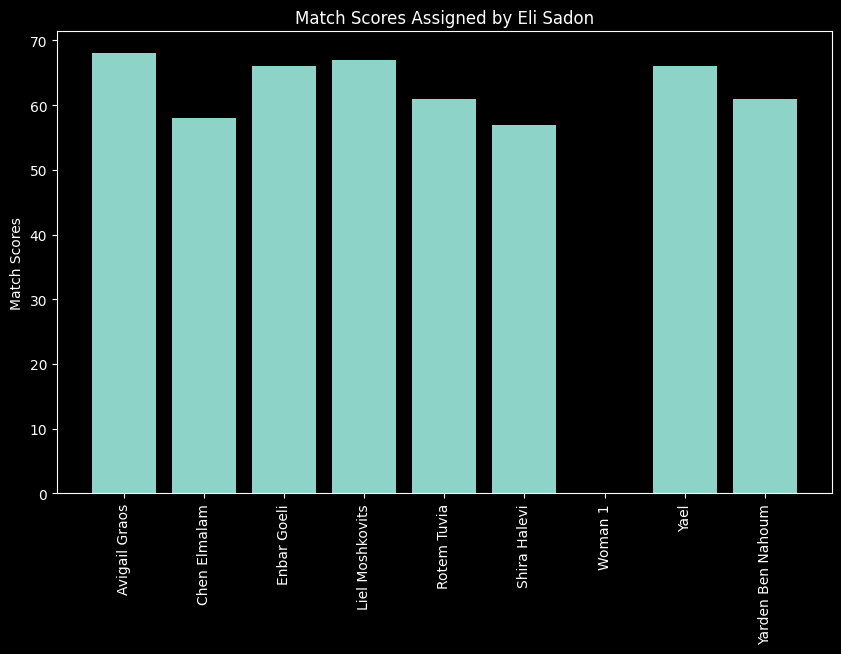

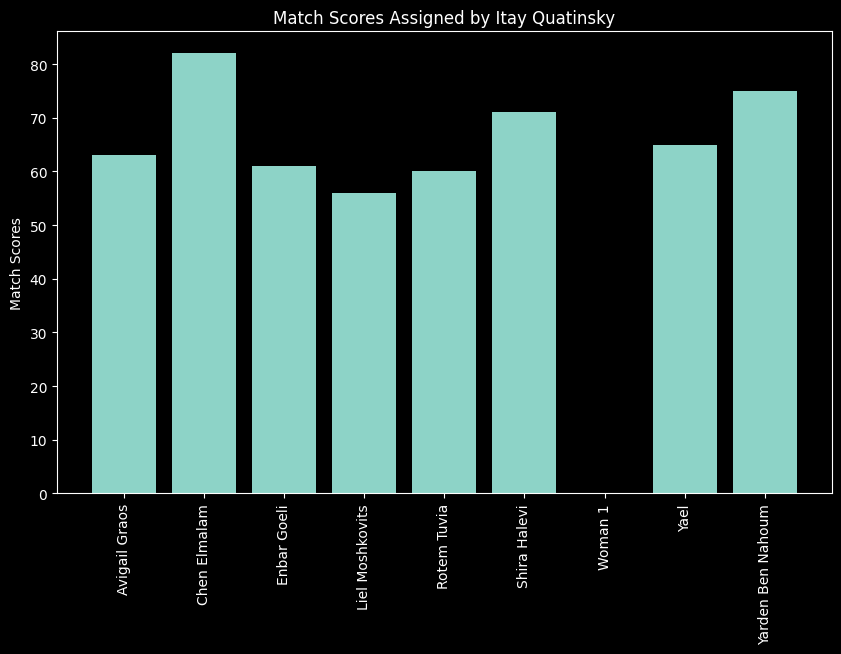

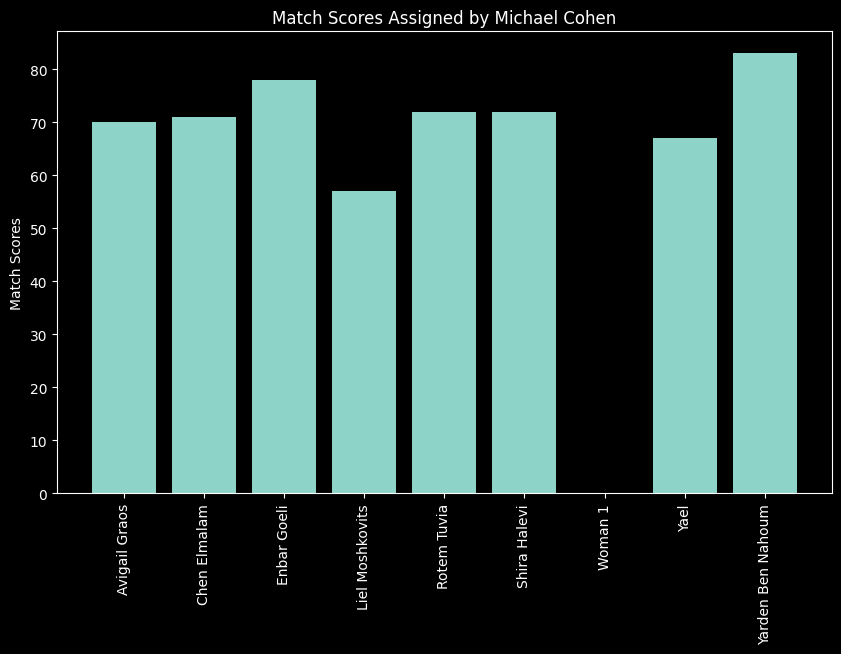

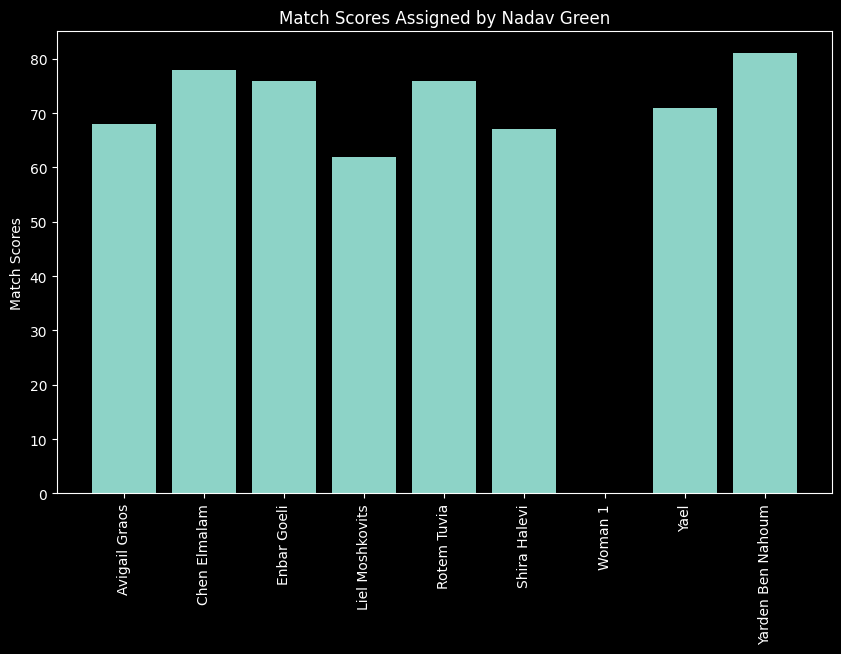

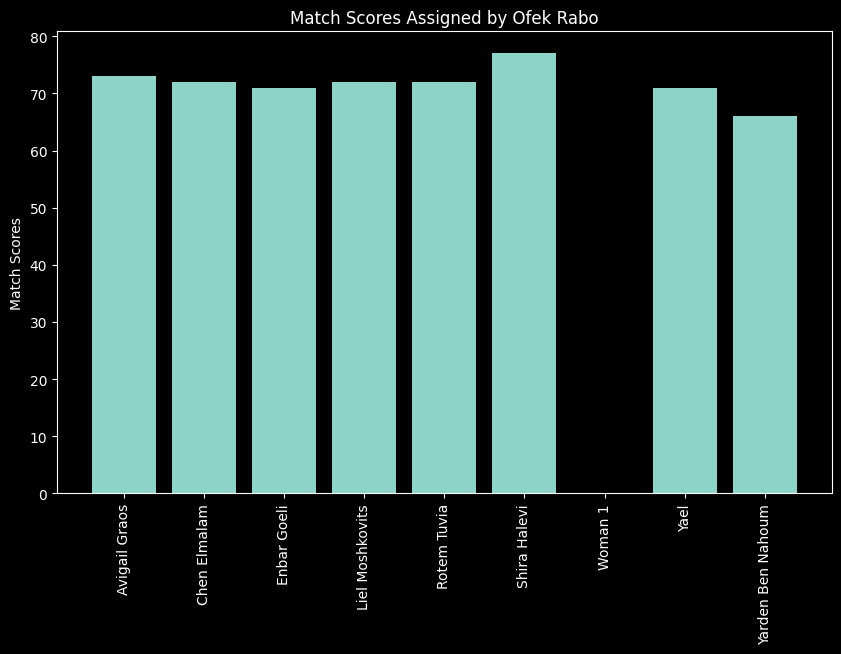

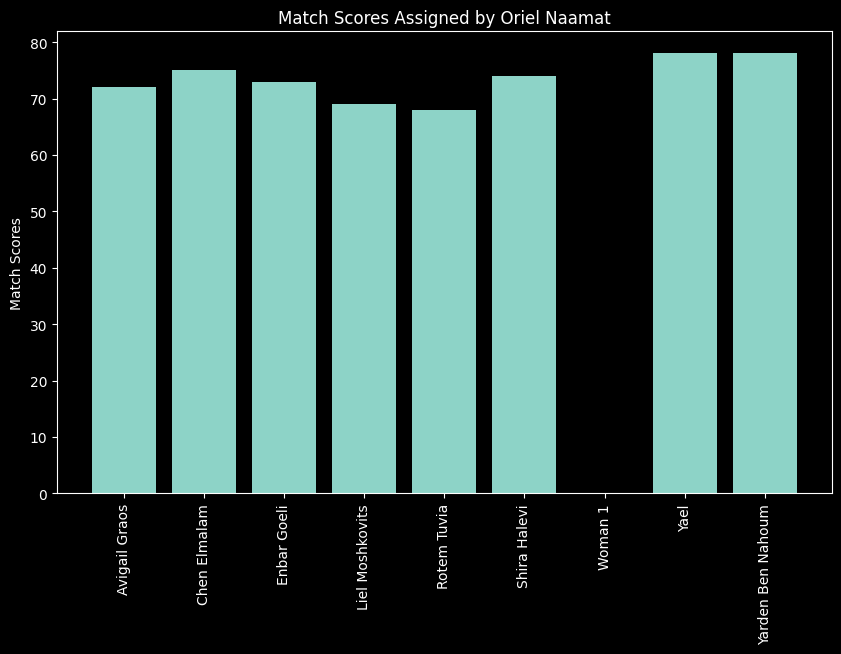

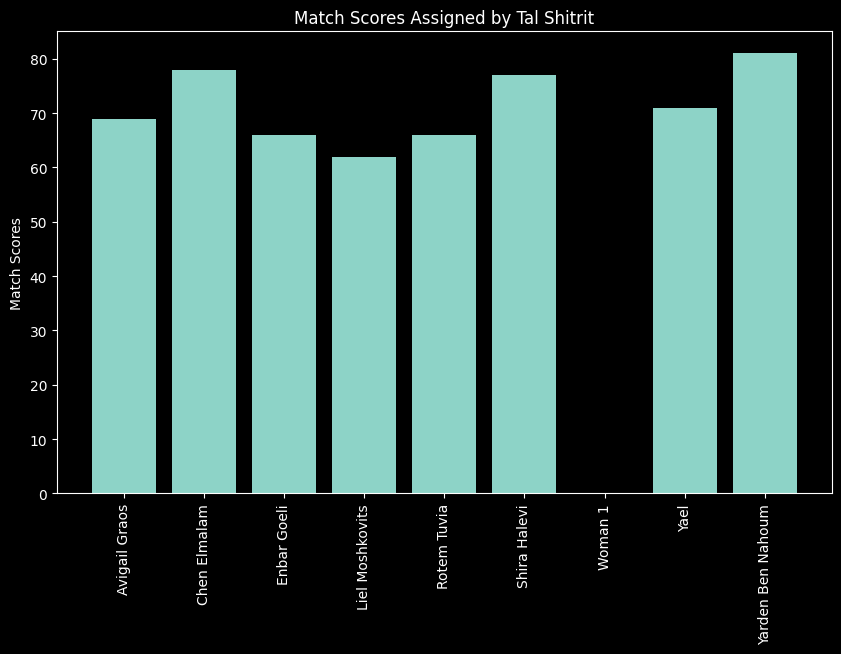

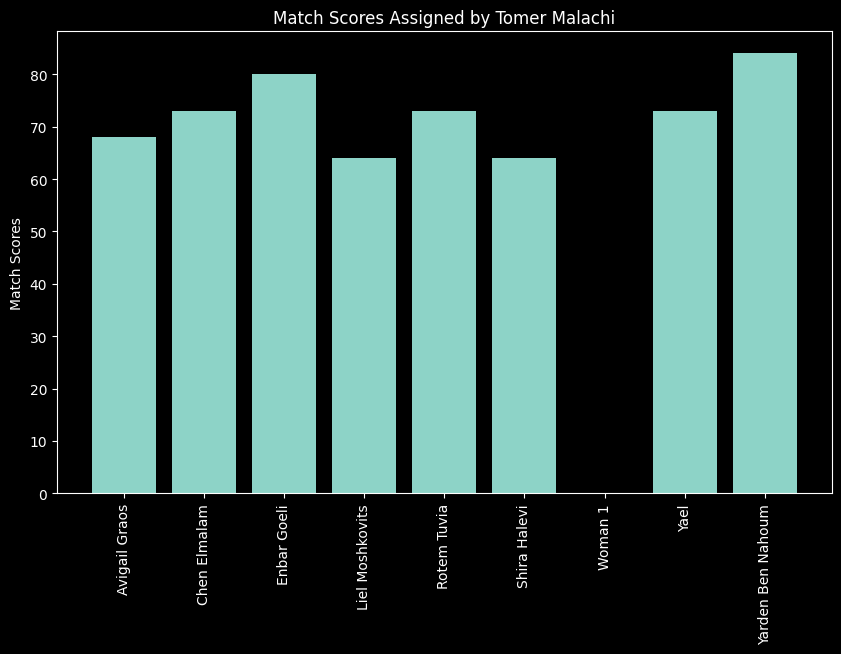

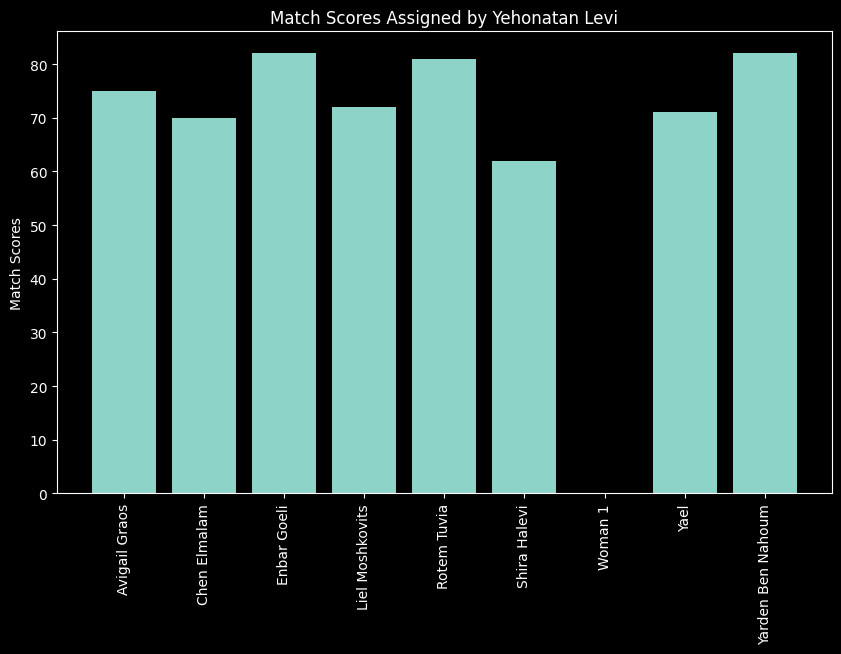

In [19]:
import matplotlib.pyplot as plt

# Iterate over the men dictionary and create a graph for each man
for man, scores in m_d.items():
    # Create a bar graph for match scores assigned by the current man
    plt.figure(figsize=(10, 6))
    plt.bar(women_list, scores)
    plt.ylabel('Match Scores')
    plt.title(f"Match Scores Assigned by {man}")

    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

    plt.show()


#===============================================================================
# #Shelly - HTML format

# #import codecs

# #matchHtmlPage = open('match.html', 'w')

# html_template+="""
# <div>
#  <h2>Graphs of match scores assigned by men:</h2>
# """

# # Iterate over the men dictionary and create a graph for each man
# for man, scores in m_d.items():
#     # Create a bar graph for match scores assigned by the current man
#     plt.figure(figsize=(10, 6))
#     plt.bar(women_list, scores)
#     plt.ylabel('Match Scores')
#     plt.title(f"Match Scores Assigned by {man}")

#     plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

#     #Shelly added the following
#     plt.savefig(f'graphs/{man}_my_plot.png')
#     #html_template+="""<p>"""f'Match Scores Assigned by {man}'"""</p>"""
#     html_template+="""<img src='"""f'{man}_my_plot.png'"""' title="""f'Match Scores Assigned by {man}'""" />"""


# html_template+="""
# </div>"""
'''</body>
</html>
"""

# writing the code into the file
matchHtmlPage.write(html_template)
# close the file
matchHtmlPage.close()'''

#===============================================================================



##Visualization of Match Scores Assigned by Men

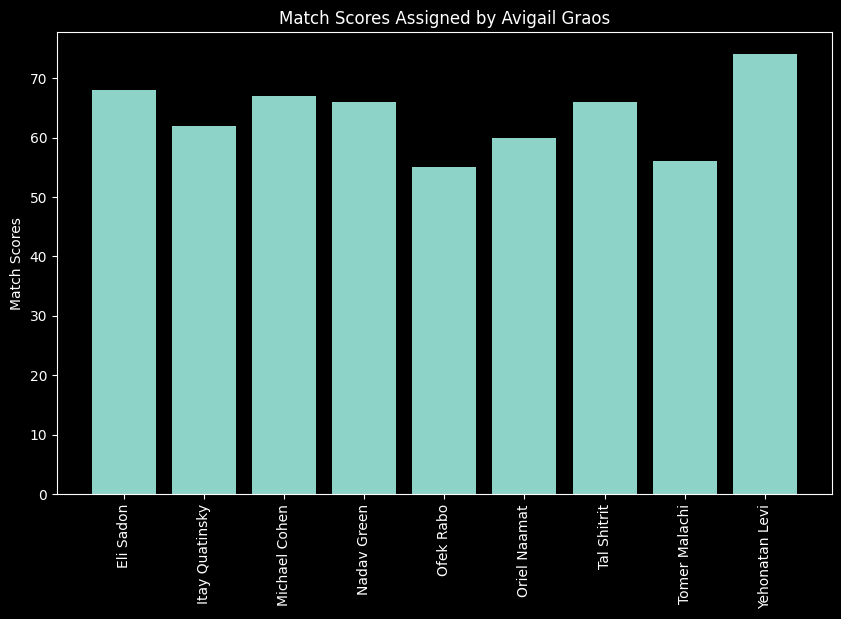

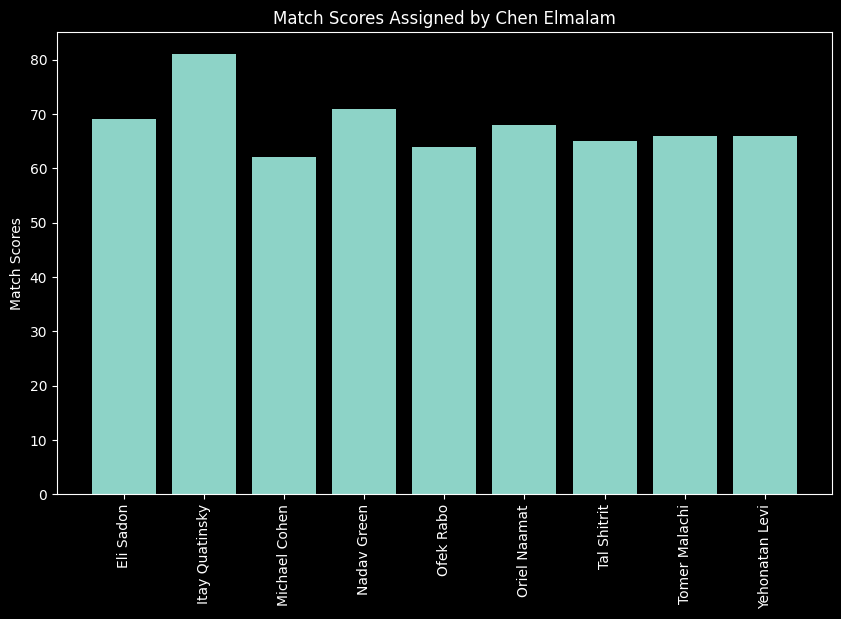

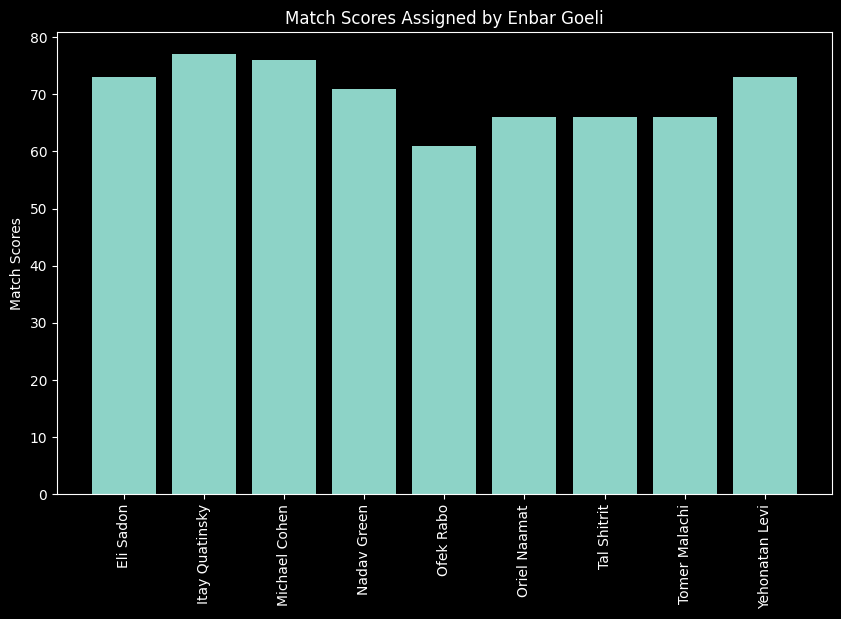

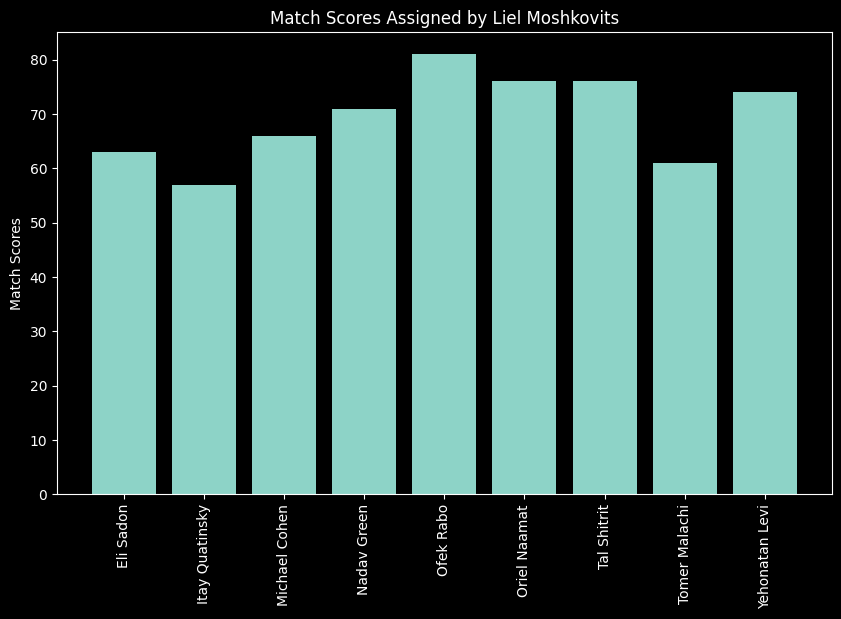

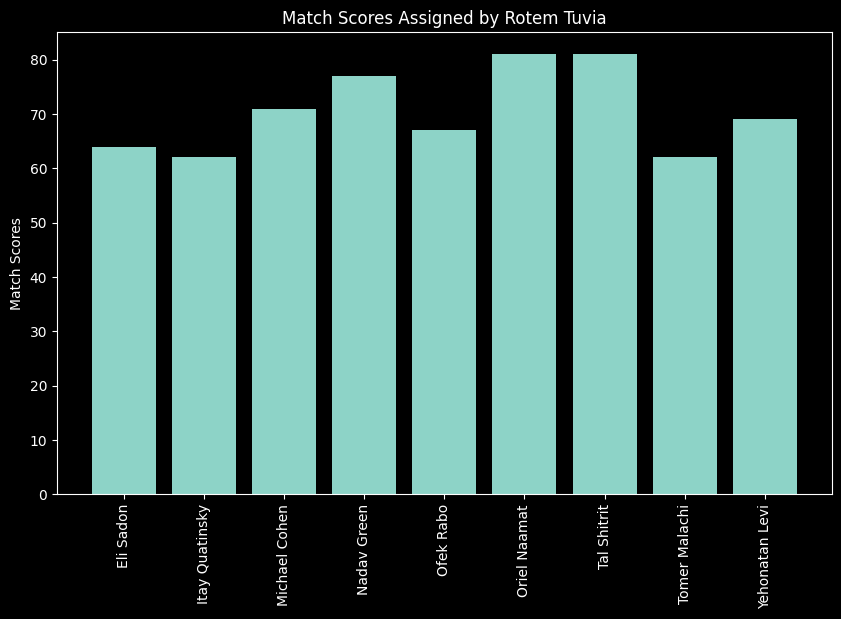

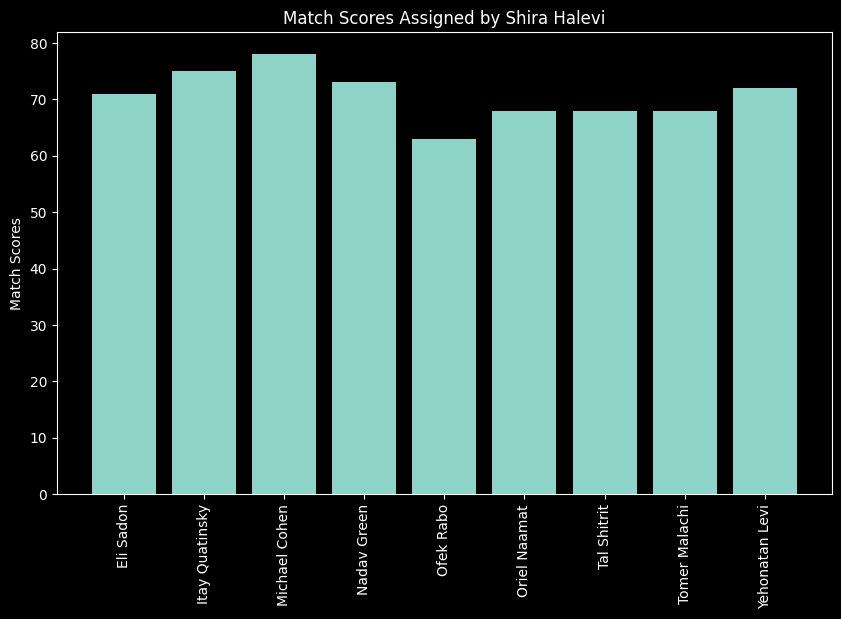

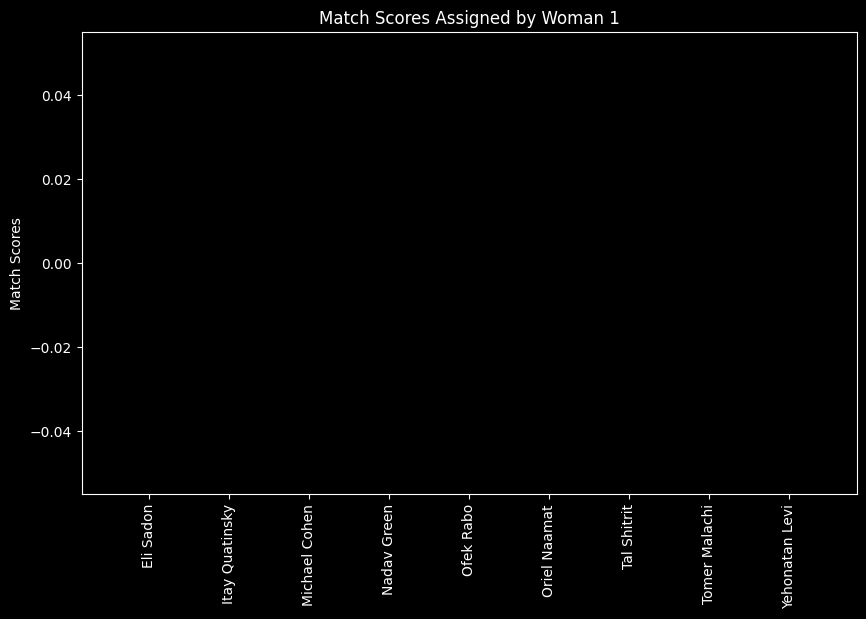

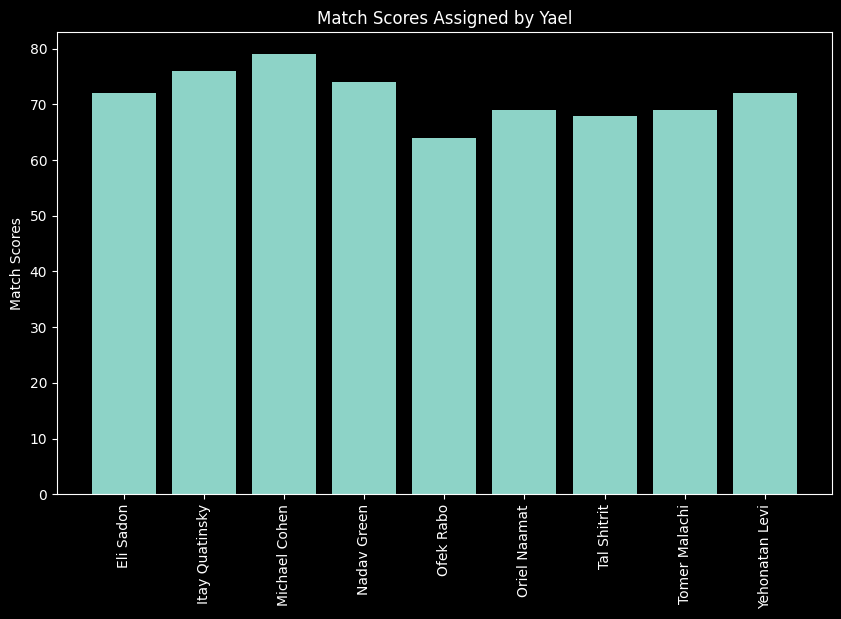

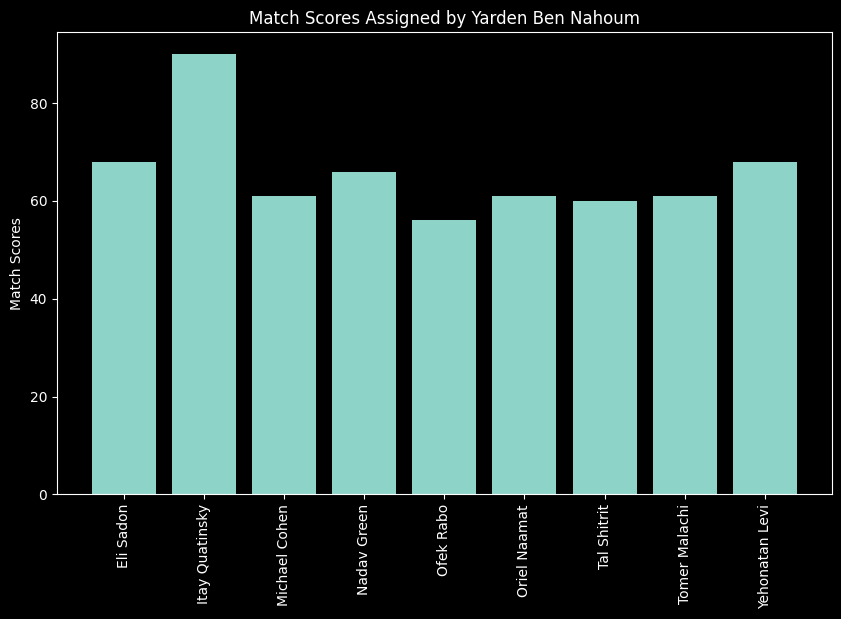

In [20]:
import matplotlib.pyplot as plt

# Iterate over the men dictionary and create a graph for each man
for woman, scores in w_d.items():
    # Create a bar graph for match scores assigned by the current man
    plt.figure(figsize=(10, 6))
    plt.bar(man_list, scores)
    plt.ylabel('Match Scores')
    plt.title(f"Match Scores Assigned by {woman}")

    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

    plt.show()


#===============================================================================
# #Shelly - HTML format

# #import codecs

# #matchHtmlPage = open('match.html', 'w')

# html_template+="""
# <div>
#  <h2>Graphs of match scores assigned by women:</h2>
# """

# # Iterate over the men dictionary and create a graph for each man
# for woman, scores in w_d.items():
#     # Create a bar graph for match scores assigned by the current man
#     plt.figure(figsize=(10, 6))
#     plt.bar(man_list, scores)
#     plt.ylabel('Match Scores')
#     plt.title(f"Match Scores Assigned by {woman}")

#     plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

#     #Shelly added the following
#     plt.savefig(f'Graphs/{woman}_my_plot.png')
#     #html_template+="""<p>"""f'Match Scores Assigned by {woman}'"""</p>"""
#     html_template+="""<img src='"""f'{woman}_my_plot.png'"""' title="""f'Match Scores Assigned by {woman}'""" />"""


# html_template+="""
# </div>
# </body>
# </html>
# """

# # writing the code into the file
# matchHtmlPage.write(html_template)
# # close the file
# matchHtmlPage.close()

#===============================================================================

## Create Match.html

In [1]:
import codecs
import matplotlib.pyplot as plt
import json

# Create a list to store the male graph filenames
male_graphs_list = []
for man, scores in m_d.items():
    plt.figure(figsize=(10, 6))
    plt.bar(women_list, scores)
    plt.ylabel('Match Scores')
    plt.title(f"Match Scores Assigned by {man}")
    plt.xticks(rotation=90)

    # Save the plot to an image file
    filename = f'Graphs/Male/{man}_my_plot.png'
    plt.savefig(filename)
    male_graphs_list.append(filename)

# Create a list to store the female graph filenames
female_graphs_list = []
for woman, scores in w_d.items():
    plt.figure(figsize=(10, 6))
    plt.bar(man_list, scores)
    plt.ylabel('Match Scores')
    plt.title(f"Match Scores Assigned by {woman}")
    plt.xticks(rotation=90)

    # Save the plot to an image file
    filename = f'Graphs/Female/{woman}_my_plot.png'
    plt.savefig(filename)
    female_graphs_list.append(filename)

# Save the lists to a JSON file
with open('data/male_graphs.json', 'w') as f:
    json.dump(male_graphs_list, f)

with open('data/female_graphs.json', 'w') as f:
    json.dump(female_graphs_list, f)

import codecs

# ... (previous code)

matchHtmlPage = open('match.html', 'w')

html_template = """<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>MatchIt</title>
    <link rel="stylesheet" href="css/styleA.css">
    <style>
        body.wide-page {
            overflow-x: hidden;
        }
        body.wide-page .container {
            width: 100%;
            max-width: none;
            padding: 0;
        }
        .matches-container p {
            font-size: 2rem;
        }
        h2 {
            font-size: 3rem;
        }
    </style>
</head>
<body class="wide-page">
    <div class="container">
        <header class="header">
            <div class="logo-container">
                <img src="Pictures/logo.png" alt="MatchIt Logo">
            </div>
            <h1>MatchIt</h1>
        </header>
        <div>
            <h2>Highest Matches:</h2>
            <div class="matches-container">"""

# Add the matches to the template
for woman, man in engagements.items():
    if woman in w_add_list:
        html_template += f"""<p style="color:red;">{man} did not find a match</p>"""
        continue
    if man in m_add_list:
        html_template += f"""<p style="color:red;">{woman} did not find a match</p>"""
        continue
    html_template += f"""<p>{woman} is matched with {man}</p>"""

html_template += """
            </div>
        </div>
        <div>
            <h2>Graphs of match scores assigned:</h2>

            <div class="graphs-button-container">
            <button onclick="getMaleGraphs()" class="graphs-button" id="menGraphsButton">Show Men Graphs</button>
            <button onclick="getFemaleGraphs()" class="graphs-button" id="womenGraphsButton">Show Females Graphs</button>
            </div>

            <div class="graphs-container" id="GraphsContainer">
                <!-- Graphs will be added here dynamically by JavaScript -->
            </div>

        </div>
    </div>
    <script src="js/script.js"></script>
</body>
</html>
"""

# writing the code into the file
matchHtmlPage.write(html_template)
# close the file
matchHtmlPage.close()



NameError: name 'm_d' is not defined

## Software Checks

### Unit- Test

In [80]:
#unit test- checks if actual matchings match the expected galeShapley matchings
import unittest
from copy import copy


class TestGaleShapley(unittest.TestCase):

    def test_gale_shapley(self):
        women_dict = {
            'Alice': ['Bob', 'Charlie', 'David'],
            'Betty': ['David', 'Bob', 'Charlie'],
            'Cathy': ['Bob', 'David', 'Charlie']
        }
        men_dict = {
            'Bob': ['Cathy', 'Betty', 'Alice'],
            'Charlie': ['Betty', 'Cathy', 'Alice'],
            'David': ['Betty', 'Alice', 'Cathy']
        }
        women_list = ['Alice', 'Betty', 'Cathy']
        men_list = ['Bob', 'Charlie', 'David']

        engagements = gale_shapley(copy(women_dict), copy(men_dict), copy(women_list), copy(men_list))

        expected_engagements = {
            'Alice': 'Charlie',
            'Betty': 'David',
            'Cathy': 'Bob'
        }

        self.assertEqual(engagements, expected_engagements)

# Run the unit tests
unittest.main(argv=[''], exit=False)


.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


### Performance Testing

In [43]:
import time

def calculate_match_score(person1, person2):
    # Define the weights for each category (higher weight means higher importance)
    weights = {
        'preferred_body_type': 5,
        'preferred_diet': 5,
        'preferred_drinks': 3,
        'preferred_drugs': 3,
        'preferred_pets': 2,
        'preferred_religion': 50,
        'preferred_smokes': 5
    }
    main_category = ['body_type', 'diet', 'drinks', 'drugs', 'pets', 'religion', 'smokes']

    # Calculate the match score between two people
    score = 0
    for preferred_category, weight in weights.items():
        for category in main_category:
            if person1[preferred_category] == person2[category]:
                score += weight
    if person1['preferred_min_age'] < person2['age'] < person1['preferred_max_age']:
        score += 10
    if person1['preferred_height'] > person2['height']:
        score += 1

    normalized_score = score
    return normalized_score

# Sample data for performance testing
person1 = {
    'preferred_body_type': 'Slim',
    'preferred_diet': 'Vegan',
    'preferred_drinks': 'Never',
    'preferred_drugs': 'Never',
    'preferred_pets': 'Dog',
    'preferred_religion': 'Christian',
    'preferred_smokes': 'No',
    'preferred_min_age': 25,
    'preferred_max_age': 35,
    'preferred_height': 170
}

person2 = {
    'body_type': 'Average',
    'diet': 'Vegetarian',
    'drinks': 'Socially',
    'drugs': 'Never',
    'pets': 'None',
    'religion': 'Christian',
    'smokes': 'No',
    'age': 30,
    'height': 165
}

# Performance Testing
num_iterations = 1000000
start_time = time.time()

for _ in range(num_iterations):
    # Call the function you want to measure
    calculate_match_score(person1, person2)

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time} seconds")


Execution Time: 3.18038272857666 seconds


## Functional Testing

In [44]:
from copy import copy, deepcopy

#Gale-Shapley function:

def gale_shapley(women_dict, men_dict, women_names, men_names):
    engagements = {}
    men_preferences = deepcopy(men_dict)
    free_men = list(men_preferences.keys())

    while free_men:
        man = free_men.pop(0)
        man_pref_list = men_preferences[man]

        if not man_pref_list:
            continue

        woman = man_pref_list.pop(0)

        if woman not in engagements:
            engagements[woman] = man
        else:
            current_man = engagements[woman]
            if women_dict[woman].index(man) < women_dict[woman].index(current_man):
                engagements[woman] = man
                if men_preferences[current_man]:
                    free_men.append(current_man)
            else:
                if man_pref_list:
                    free_men.append(man)

    return engagements



# Test Case 1: Empty input dictionaries
def test_gale_shapley_empty_input():
    women_dict = {}
    men_dict = {}
    expected_engagements = {}

    engagements = gale_shapley(women_dict, men_dict, [], [])
    assert engagements == expected_engagements, "Mismatch in engagements"


# Test Case 2: Single woman and single man
def test_gale_shapley_single_pair():
    women_dict = {'Alice': ['Bob']}
    men_dict = {'Bob': ['Alice']}
    expected_engagements = {'Alice': 'Bob'}

    engagements = gale_shapley(women_dict, men_dict, ['Alice'], ['Bob'])
    assert engagements == expected_engagements, "Mismatch in engagements"

# Test Case 3: Random preferences
def test_gale_shapley_random_preferences():
    women_dict = {'Alice': ['Bob', 'Charlie'], 'Cathy': ['Charlie', 'Bob']}
    men_dict = {'Bob': ['Alice', 'Cathy'], 'Charlie': ['Cathy', 'Alice']}
    expected_engagements = {'Alice': 'Bob', 'Cathy': 'Charlie'}

    engagements = gale_shapley(women_dict, men_dict, ['Alice', 'Cathy'], ['Bob', 'Charlie'])
    assert engagements == expected_engagements, "Mismatch in engagements"



    engagements = gale_shapley(women_dict, men_dict, ['Alice', 'Cathy'], ['Bob', 'Charlie'])
    assert engagements == expected_engagements, "Mismatch in engagements"

# Run all the test cases
def run_tests():
    test_gale_shapley_empty_input()
    test_gale_shapley_single_pair()
    test_gale_shapley_random_preferences()

    print("All test cases passed successfully.")

run_tests()



All test cases passed successfully.


## Execution Time

In [53]:
import time

# Start the timer
start_time = time.time()


import pandas as pd
import numpy as np
from collections import Counter
from copy import copy


import csv
import random
import datetime

# The entire code:
def add_line_to_csv(csv_file, line_data):
    # Open the CSV file in append mode and ensure it doesn't append newlines automatically
    with open(csv_file, 'a', newline='') as file:
        # Create a CSV writer object
        writer = csv.writer(file)
        # Write the line_data to the CSV file as a new row
        writer.writerow(line_data)

def generate_random_data(csv_file, num_people,sex):
    # Define the categories for the CSV data
    categories = ['name', 'sex', 'age', 'body_type', 'diet', 'drinks', 'drugs', 'height', 'pets', 'religion', 'smokes','preferred_min_age', 'preferred_max_age', 'preferred_body_type', 'preferred_diet', 'preferred_drinks', 'preferred_drugs'
    , 'preferred_height', 'preferred_pets', 'preferred_religion', 'preferred_smokes','updated_at']
    data = []
    men_names = [f"Man {i+1}" for i in range(num_people)]
    women_names = [f"Woman {i+1}" for i in range(num_people)]
    current_timestamp = datetime.datetime.now()
    # Generate data for male individuals
    if(sex=='M'):
      for i in range(num_people):
          person = {'name': men_names[i], 'sex': 'M'}
          data.append(person)
    # Generate data for female individuals
    if(sex=='F'):
      for i in range(num_people):
          person = {'name': women_names[i], 'sex': 'F'}
          data.append(person)

    # Generate random data for each person
    for person in data:
        for category in categories[2:]:
            if category == 'age':
                person[category] = random.randint(18, 35)
            elif category == 'body_type':
                person[category] = random.choice(['Slim', 'Average', 'Athletic', 'Curvy'])
            elif category == 'diet':
                person[category] = random.choice(['Vegan', 'Vegetarian', 'Omnivore'])
            elif category == 'drinks':
                person[category] = random.choice(['Never', 'Socially', 'Regularly'])
            elif category == 'drugs':
                person[category] = random.choice(['Never', 'Sometimes', 'Often'])
            elif category == 'height':
                person[category] = random.randint(150, 200)
            elif category == 'pets':
                person[category] = random.choice(['Dog', 'Cat', 'None'])
            elif category == 'religion':
                person[category] = random.choice(['Christian', 'Muslim', 'Jewish', 'Other'])
            elif category == 'smokes':
                person[category] = random.choice(['No', 'Occasionally', 'Yes'])
            elif category == 'preferred_min_age':
                person[category] = random.randint(18, 35)
            elif category == 'preferred_max_age':
                person[category] = person['preferred_min_age']+10
            elif category == 'preferred_body_type':
                person[category] = random.choice(['Slim', 'Average', 'Athletic', 'Curvy'])
            elif category == 'preferred_diet':
                person[category] = random.choice(['Vegan', 'Vegetarian', 'Omnivore'])
            elif category == 'preferred_drinks':
                person[category] = random.choice(['Never', 'Socially', 'Regularly'])
            elif category == 'preferred_drugs':
                person[category] = random.choice(['Never', 'Sometimes', 'Often'])
            elif category == 'preferred_height':
                person[category] = random.randint(150, 200)
            elif category == 'preferred_pets':
                person[category] = random.choice(['Dog', 'Cat', 'None'])
            elif category == 'preferred_religion':
                person[category] = random.choice(['Christian', 'Muslim', 'Jewish', 'Other'])
            elif category == 'preferred_smokes':
                person[category] = random.choice(['No', 'Occasionally', 'Yes'])
            person['updated_at']=current_timestamp
        # Create a list of values for the CSV row based on the person's data
        line_data = [person[category] for category in categories]
        # Add the line_data to the CSV file
        add_line_to_csv(csv_file, line_data)

import csv
import os

def read_csv_data(csv_file):
    people = []
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            people.append(row)
    return people

def add_lines_to_csv(file1, file2):
    with open(file2, 'r') as f2:
        lines = f2.readlines()
    with open(file1, 'a') as f1:
        f1.writelines(lines)

# Example usage
csv_file = 'data/people.csv'
people_data = read_csv_data(csv_file)

man_list = []
women_list = []

# Extract names from the CSV data based on the 'sex' column
for person in people_data:
    name = person['name']
    sex = person['sex']

    if sex == 'M':
        man_list.append(name)
    elif sex == 'F':
        women_list.append(name)

# Example usage - If the number of men and women is not balanced, generate random data
num_none = abs(len(man_list) - len(women_list))
if num_none > 0:
    if len(man_list) < len(women_list):
        generate_random_data('temp_people.csv', num_none, 'M')
        add_lines_to_csv(csv_file, 'temp_people.csv')
    elif len(man_list) > len(women_list):
        generate_random_data('temp_people.csv', num_none, 'F')
        add_lines_to_csv(csv_file, 'temp_people.csv')

# Re-read the updated CSV data
people_data = read_csv_data(csv_file)

man_list = []
women_list = []

# Extract names from the updated CSV data
for person in people_data:
    name = person['name']
    sex = person['sex']

    if sex == 'M':
        man_list.append(name)
    elif sex == 'F':
        women_list.append(name)

num_people = len(man_list) + len(women_list)

# Sort the lists of names
man_list = sorted(man_list)
women_list = sorted(women_list)


# Remove the temporary people CSV file
if num_none > 0:
    os.remove('temp_people.csv')

import csv
import pandas as pd
import math
import copy

def calculate_match_score(person1, person2):
    # Define the weights for each category (higher weight means higher importance)
    weights = {
        'preferred_body_type': 5,
        'preferred_diet': 5,
        'preferred_drinks': 3,
        'preferred_drugs': 3,
        'preferred_pets': 2,
        'preferred_religion': 50,
        'preferred_smokes': 5
    }
    main_category = ['body_type', 'diet', 'drinks', 'drugs', 'pets', 'religion', 'smokes']

   # Calculate the match score between two people
    score = 0
    for preferred_category, weight in weights.items():
      for category in main_category:
        if person1[preferred_category] == person2[category]:
          score += weight
    if (person1['preferred_min_age'] < person2['age']<person1['preferred_max_age']):
      score += 10
    if (person1['preferred_height'] > person2['height']):
      score += 1
    # Normalize the score based on the number of people
    #max_score = (len(weights)+2) * max(list(weights.values()))
    #normalized_score = (score / max_score) * (num_people)
    #print(math.floor(normalized_score),' ',normalized_score)
    normalized_score = score
    return normalized_score

def create_match_scores_dataframes(csv_file):
    # Read the CSV file into a list of dictionaries
    people = []
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            people.append(row)

    # Separate men and women into different lists
    men = []
    women = []
    for person in people:
        if person['sex'] == 'M':
            men.append(person)
        elif person['sex'] == 'F':
            women.append(person)

    # Create DataFrames for men and women
    men = sorted(men, key=lambda x: x['name'])
    women = sorted(women, key=lambda x: x['name'])

    women_data = pd.DataFrame(columns=[person['name'] for person in women])
    men_data = pd.DataFrame(columns=[person['name'] for person in men])
    women_data=women_data.reindex(sorted(women_data.columns), axis=1)
    men_data=men_data.reindex(sorted(men_data.columns), axis=1)
    # Calculate the match score between each pair of women
    for i in range(len(women)):
        for j in range(len(men)):
            person1 = women[i]
            person2 = men[j]
            match_score = calculate_match_score(person1, person2)
            women_data.at[j, person1['name']] = match_score

    # Calculate the match score between each pair of men
    for i in range(len(men)):
        for j in range(len(women)):
            person1 = men[i]
            person2 = women[j]
            match_score = calculate_match_score(person1, person2)
            men_data.at[j, person1['name']] = match_score
    # Fill diagonal elements with a default value (e.g., 0)
    women_data.fillna(1, inplace=True)
    men_data.fillna(1, inplace=True)

    return women_data, men_data

# Example usage
csv_file = 'data/people.csv'
women_df, men_df = create_match_scores_dataframes(csv_file)

# Sort the DataFrames by column names
women_df = women_df.sort_index(axis=1)
men_df = men_df.sort_index(axis=1)

# Rank the scores in the DataFrames

#women_df = women_df.rank(axis=0, method='min', ascending=True)
#men_df = men_df.rank(axis=0, method='min', ascending=True)

w_add_list=[]
m_add_list=[]

# Check if additional RANDOM women or men were added
for item in man_list:
    for i in range(len(man_list)):
        if f"Man {i+1}" in item:
            m_add_list.append(item)
for item in women_list:
    for i in range(len(women_list)):
        if f"Woman {i+1}" in item:
            w_add_list.append(item)

# Convert the DataFrames to integer type
women_df = women_df.astype(int)
men_df = men_df.astype(int)

# Zero socres for Random pepoles
if len(m_add_list) < len(w_add_list):
  women_df[w_add_list] = 0
  for i in range(len(w_add_list)):
    index = women_list.index(f"Woman {i+1}")
    men_df.loc[index] = 0
else:
  men_df[w_add_list] = 0
  for i in range(len(m_add_list)):
    index = man_list.index(f"Man {i+1}")
    women_df.loc[index] = 0

women_dictionary = women_df.to_dict(orient='list')
men_dictionary = men_df.to_dict(orient='list')

# Sort the lists of men for each woman based on the scores
w_d=copy.deepcopy(women_dictionary)
m_d=copy.deepcopy(men_dictionary)
for woman in women_dictionary:
    scores = women_dictionary[woman]
    sorted_scores = sorted(range(len(scores)), key=lambda k: (-scores[k], man_list[k]))
    sorted_men = [man_list[i] for i in sorted_scores]
    women_dictionary[woman] = sorted_men



# Repeat the same process for the men's dictionary
for man in men_dictionary:
    scores = men_dictionary[man]
    sorted_scores = sorted(range(len(scores)), key=lambda k: (-scores[k], women_list[k]))
    sorted_women = [women_list[i] for i in sorted_scores]
    men_dictionary[man] = sorted_women


from copy import copy
import json

def gale_shapley(women_dict, men_dict, women_names, men_names):
    engagements = {}
    men_preferences = men_dict.copy()
    free_men = list(men_preferences.keys())

    while free_men:
        man = free_men.pop(0)
        man_pref_list = men_preferences[man]

        if not man_pref_list:
            continue

        woman = man_pref_list.pop(0)

        if woman not in engagements:
            engagements[woman] = man
        else:
            current_man = engagements[woman]
            if women_dict[woman].index(man) < women_dict[woman].index(current_man):
                engagements[woman] = man
                if men_preferences[current_man]:
                    free_men.append(current_man)
            else:
                if man_pref_list:
                    free_men.append(man)

    return engagements

# Apply Gale-Shapley algorithm on the generated dictionaries
engagements = gale_shapley(women_dictionary, men_dictionary, women_list, man_list)

# Create a list to store the matches
matches = []

# Iterate over the engagements and append matches to the list
for woman, man in engagements.items():
    if woman not in w_add_list and man not in m_add_list:
        matches.append({
            'woman': woman,
            'man': man
        })

# # Write the matches to the JSON file
# with open('data/matches.json', 'a') as file:
#     json.dump(matches, file)


# End the timer
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Print the execution time
print(f"Execution time: {execution_time} seconds")





Execution time: 0.017985105514526367 seconds


## Quality Of The Solution

### Stablilty check

In [28]:
def gale_shapley(women_dict, men_dict, women_names, men_names):
    engagements = {}
    men_preferences = men_dict.copy()
    free_men = list(men_preferences.keys())

    while free_men:
        man = free_men.pop(0)
        man_pref_list = men_preferences[man]

        if not man_pref_list:
            continue

        woman = man_pref_list.pop(0)

        if woman not in engagements:
            engagements[woman] = man
        else:
            current_man = engagements[woman]
            if women_dict[woman].index(man) < women_dict[woman].index(current_man):
                engagements[woman] = man
                if men_preferences[current_man]:
                    free_men.append(current_man)
            else:
                if man_pref_list:
                    free_men.append(man)

    return engagements


def check_stability(matches, women_dict, men_dict):
    for woman, man in matches.items():
        woman_pref_list = women_dict[woman]
        man_pref_list = men_dict[man]
        woman_index = woman_pref_list.index(man)
        preferred_men = woman_pref_list[:woman_index]

        for preferred_man in preferred_men:
            current_woman = matches[preferred_man]
            if man_pref_list.index(current_woman) > man_pref_list.index(woman):
                return False

    return True


# Apply Gale-Shapley algorithm on the generated dictionaries
engagements = gale_shapley(women_dictionary, men_dictionary, women_list, man_list)

# Check Stability
is_stable = check_stability(engagements, women_dictionary, men_dictionary)
if is_stable:
    print("The matches are stable.")
else:
    print("The matches are unstable.")


The matches are stable.
